In [1]:
# pandas介绍和示例

In [2]:
# numpy和pandas的区别：
# 如果用python的列表和字典来作比较，那么可以说Numpy是列表形式的，没有数值标签；
# 而pandas就是字典形式。

# Pandas是基于Numpy构建的，让Numpy为中心的应用变得更加简单。

In [3]:
# Pandas两个主要的数据集结构：Series和DataFrame

In [4]:
# Series

In [5]:
import pandas as pd
import numpy as np
s = pd.Series([1,3,6,np.nan,44,1])
print(s)

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


In [6]:
# Series的字符串表现形式为：索引在左边，值在右边。
# 由于我们没有为数据指定索引。
# 于是会自动创建一个0到N-1（N为长度）的整数型索引。

In [7]:
# DataFrame

In [8]:
dates = pd.date_range('20160101',periods= 6)
df = pd.DataFrame(np.random.randn(6,4),
                  index = dates,
                  columns=['a','b','c','d'])
print(df)

                   a         b         c         d
2016-01-01 -0.639802 -0.125318  0.665270 -0.122998
2016-01-02  0.123817  0.287925 -0.873835 -0.392039
2016-01-03 -0.271052  0.576288  0.672164  0.485653
2016-01-04  0.479456  0.143383 -1.015375  1.681958
2016-01-05 -1.464155  0.788675 -0.518137 -1.932241
2016-01-06 -0.193175  0.437634 -0.755545 -0.917463


In [9]:
# DataFrame是一个表格型的数据结构，它包含有一组有序的列
# 每列可以是不同的值类型（数值，字符串，布尔值等）。
# DataFrame既有行索引，也有列索引，它可以被看做由Series组成的大字典。

In [11]:
# 我们可以更具每一个不同的索引来挑选数据
print(df['b'])

2016-01-01   -0.125318
2016-01-02    0.287925
2016-01-03    0.576288
2016-01-04    0.143383
2016-01-05    0.788675
2016-01-06    0.437634
Freq: D, Name: b, dtype: float64


In [12]:
# 我们在创建一组没有给定行标签和列标签的数据df1
df1 = pd.DataFrame(np.arange(12).reshape((3,4)))
print(df1)  # 采取默认的从0开始 index

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [13]:
# 生成df的第二种方法：
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(['test','train','test','train']),
                   'F':'foo'})
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [14]:
# 这种方法能对每一列的数据进行特殊对待。
# 如果想要查看数据中的类型，我们可以用dtype这个属性。

In [15]:
print(df2.dtypes)

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


In [16]:
# 查看对列的序号
print(df2.index)

Int64Index([0, 1, 2, 3], dtype='int64')


In [18]:
# 每种数据的名称
print(df2.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


In [19]:
# 仅查看df2的值
print(df2.values)

[[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']]


In [20]:
# 想知道数据的描述性总结--仅返回数值型数据的描述性统计量
print(df2.describe())

         A    C    D
count  4.0  4.0  4.0
mean   1.0  1.0  3.0
std    0.0  0.0  0.0
min    1.0  1.0  3.0
25%    1.0  1.0  3.0
50%    1.0  1.0  3.0
75%    1.0  1.0  3.0
max    1.0  1.0  3.0


In [21]:
# 翻转数据transponse
print(df2.T)

                     0                    1                    2  \
A                    1                    1                    1   
B  2013-01-02 00:00:00  2013-01-02 00:00:00  2013-01-02 00:00:00   
C                    1                    1                    1   
D                    3                    3                    3   
E                 test                train                 test   
F                  foo                  foo                  foo   

                     3  
A                    1  
B  2013-01-02 00:00:00  
C                    1  
D                    3  
E                train  
F                  foo  


In [22]:
# 对数据的index进行排序并输出
print(df2.sort_index(axis=1, ascending = False))

     F      E  D    C          B    A
0  foo   test  3  1.0 2013-01-02  1.0
1  foo  train  3  1.0 2013-01-02  1.0
2  foo   test  3  1.0 2013-01-02  1.0
3  foo  train  3  1.0 2013-01-02  1.0


In [23]:
print(df2.sort_index(axis=0, ascending = False))

     A          B    C  D      E    F
3  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
0  1.0 2013-01-02  1.0  3   test  foo


In [24]:
# 对数据 值 排序输出
print(df2.sort_values(by='B'))

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [ ]:
# 数据获取

In [26]:
# 创建一个6*4的矩阵
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),
                 index = dates,
                 columns = ['A','B','C','D'])
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [27]:
# 简单的筛选
print(df['A']) # 索引

2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int64


In [28]:
print(df.A) # 与索引获取等价

2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int64


In [29]:
# 索引：选择多行或多列
print(df[0:3])

            A  B   C   D
2013-01-01  0  1   2   3
2013-01-02  4  5   6   7
2013-01-03  8  9  10  11


In [30]:
print(df['20130102':'20130104'])

             A   B   C   D
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15


In [31]:
# 如果df[3:3]将会是一个空对象。
print(df[3:3])

Empty DataFrame
Columns: [A, B, C, D]
Index: []


In [32]:
# 根据标签loc

In [33]:
# 我们可以使用标签来选择数据loc。
print(df.loc['20130102'])

A    4
B    5
C    6
D    7
Name: 2013-01-02 00:00:00, dtype: int64


In [34]:
print(df.loc[:,['A','B']])

             A   B
2013-01-01   0   1
2013-01-02   4   5
2013-01-03   8   9
2013-01-04  12  13
2013-01-05  16  17
2013-01-06  20  21


In [35]:
print(df.loc['20130102',['A','B']])

A    4
B    5
Name: 2013-01-02 00:00:00, dtype: int64


In [36]:
# 根据序列 iloc

In [37]:
# 另外我们可以采用位置进行选择iloc，
print(df.iloc[3,1])

13


In [39]:
print(df.iloc[3:5,1:3])

             B   C
2013-01-04  13  14
2013-01-05  17  18


In [40]:
print(df.iloc[[1,3,5],1:3])

             B   C
2013-01-02   5   6
2013-01-04  13  14
2013-01-06  21  22


In [41]:
# 根据混合的这两种ix

In [42]:
# 我们可以采用混合选择ix,
# 其中选择‘A'和’C'两列，并选择前三行的数据。
print(df.ix[:3,['A','C']])

            A   C
2013-01-01  0   2
2013-01-02  4   6
2013-01-03  8  10


/Users/zoe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
# 通过判断的筛选

In [44]:
# 我们可以采用判断指定Boolean indexing进行选择。
# 我们可以约束其某项条件然后选择出当前所有数据
print(df[df.A>8])

             A   B   C   D
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [45]:
# Pandas设置值

In [46]:
df

,A,B,C,D
2013-01-01,0,1,2,3
2013-01-02,4,5,6,7
2013-01-03,8,9,10,11
2013-01-04,12,13,14,15
2013-01-05,16,17,18,19
2013-01-06,20,21,22,23


In [47]:
# 根据位置设置loc和iloc

In [49]:
# 我们可以利用索引或者标签确定需要修改值的位置。
df.iloc[2,2] = 1111
df.loc['20130101','B'] = 2222
print(df)

             A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     9  1111  11
2013-01-04  12    13    14  15
2013-01-05  16    17    18  19
2013-01-06  20    21    22  23


In [50]:
# 根据条件设置

In [52]:
df.B[df.A>4]=0

In [53]:
df

,A,B,C,D
2013-01-01,0,2222,2,3
2013-01-02,4,5,6,7
2013-01-03,8,0,1111,11
2013-01-04,12,0,14,15
2013-01-05,16,0,18,19
2013-01-06,20,0,22,23


In [54]:
# 按行或列设置

In [55]:
# 如果对整列做批处理，加上一列'F',并将F列全改为NaN
df['F'] = np.nan
print(df)

             A     B     C   D   F
2013-01-01   0  2222     2   3 NaN
2013-01-02   4     5     6   7 NaN
2013-01-03   8     0  1111  11 NaN
2013-01-04  12     0    14  15 NaN
2013-01-05  16     0    18  19 NaN
2013-01-06  20     0    22  23 NaN


In [56]:
# 添加数据
df['E'] = pd.Series([1,2,3,4,5,6],
                   index = pd.date_range('20130101',periods=6))

In [57]:
df

,A,B,C,D,F,E
2013-01-01,0,2222,2,3,NaN,1
2013-01-02,4,5,6,7,NaN,2
2013-01-03,8,0,1111,11,NaN,3
2013-01-04,12,0,14,15,NaN,4
2013-01-05,16,0,18,19,NaN,5
2013-01-06,20,0,22,23,NaN,6


In [58]:
# 处理丢失数据（缺失值）

In [59]:
# 有时候我们导入或处理数据，会产生一些空的或者NaN数据，
# 如何删除或者填补这些NaN数据。

In [60]:
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),
                 index = dates,
                 columns = ['A','B','C','D'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
df

,A,B,C,D
2013-01-01,0,NaN,2.0,3
2013-01-02,4,5.0,NaN,7
2013-01-03,8,9.0,10.0,11
2013-01-04,12,13.0,14.0,15
2013-01-05,16,17.0,18.0,19
2013-01-06,20,21.0,22.0,23


In [62]:
# pd.dropna()
# 直接去掉有NaN的行或列
df.dropna(axis=0,  # 0:对行进行操作；1：对列进行操作
          how='any') # 'any':只要存在NaN就drop掉；
                    # 'all'：必须全部是NaN才drop

,A,B,C,D
2013-01-03,8,9.0,10.0,11
2013-01-04,12,13.0,14.0,15
2013-01-05,16,17.0,18.0,19
2013-01-06,20,21.0,22.0,23


In [63]:
df

,A,B,C,D
2013-01-01,0,NaN,2.0,3
2013-01-02,4,5.0,NaN,7
2013-01-03,8,9.0,10.0,11
2013-01-04,12,13.0,14.0,15
2013-01-05,16,17.0,18.0,19
2013-01-06,20,21.0,22.0,23


In [64]:
# pd.fillna()
# 如果是将NaN的值用其他值代替
df.fillna(value=0)

,A,B,C,D
2013-01-01,0,0.0,2.0,3
2013-01-02,4,5.0,0.0,7
2013-01-03,8,9.0,10.0,11
2013-01-04,12,13.0,14.0,15
2013-01-05,16,17.0,18.0,19
2013-01-06,20,21.0,22.0,23


In [65]:
df

,A,B,C,D
2013-01-01,0,NaN,2.0,3
2013-01-02,4,5.0,NaN,7
2013-01-03,8,9.0,10.0,11
2013-01-04,12,13.0,14.0,15
2013-01-05,16,17.0,18.0,19
2013-01-06,20,21.0,22.0,23


In [66]:
# pd.isnull()
# 是否有缺失数据NaN，为True的表示缺失数据
df.isnull()

,A,B,C,D
2013-01-01,False,True,False,False
2013-01-02,False,False,True,False
2013-01-03,False,False,False,False
2013-01-04,False,False,False,False
2013-01-05,False,False,False,False
2013-01-06,False,False,False,False


In [67]:
# 检测在数据中是否存在NaN，如果存在就返回True:
np.any(df.isnull()) == True


True

In [68]:
# 导入导出
# pandas可以读取与存取的资料格式有很多种
# 如：csv,excel,json,html,pickle等。

In [69]:
# 读取csv
data = pd.read_csv('student.csv')

# 打印出data
print(data)

   Student ID,name ,age,gender
0         1100,Kelly,22,Female
1           1101,Clo,21,Female
2         1102,Tilly,22,Female
3            1103,Tony,24,Male
4           1104,David,20,Male
5         1105,Catty,22,Female
6              1106,M,3,Female
7               1107,N,43,Male
8               1108,A,13,Male
9               1109,S,12,Male
10          1110,David,33,Male
11            1111,Dw,3,Female
12              1112,Q,23,Male
13            1113,W,21,Female


In [70]:
# 将资料存取成pickle
data.to_pickle('student.pickle')

In [72]:
# pandas合并concat
# 要点：pandas处理多组数据的时候往往会要用到数据的合并处理，
# 使用concat时一种基本的合并方式。
# 而且concat中有很多参数可以调整，合并成你想要的数据形式。

In [73]:
# 参数axis 合并方向
# axis = 0 是预设值，因此未设定任何参数时，函数默认axis=0

In [74]:
# 定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns = ['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns = ['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns = ['a','b','c','d'])

In [79]:
# concat纵向合并
res = pd.concat([df1, df2, df3], axis=0)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [80]:
# 参数：ignore_index(重置index)

In [81]:
res = pd.concat([df1,df2,df3],axis=0,ignore_index=True)
print(res)  

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [82]:
# 参数：join 合并方式
# 默认值为join='outer'  
#         依照column来做纵向合并，有相同的column上下合并在一起，
#         其他独自的column个自成列，原本没有值的位置皆以NaN填充。
        

In [85]:
df1 = pd.DataFrame(np.ones((3,4))*0, columns = ['a','b','c','d'], index =[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns = ['b','c','d','e'], index =[2,3,4])

In [88]:
# 纵向“外”合并df1与df2
res = pd.concat([df1, df2], axis = 0, join='outer')
print(res)

     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


In [89]:
# 上面的示例中，只有相同的column合并在一起，其他的会被抛弃。

In [90]:
# 纵向“内”合并df1与df2
res = pd.concat([df1,df2],axis=0,join='inner')
print(res)

     b    c    d
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0


In [91]:
# 重置index并打印结果
res = pd.concat([df1, df2], 
                axis = 0, 
                join= 'inner', 
                ignore_index = True)
print(res)

     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


In [92]:
# 参数join_axes(依照axes合并)

In [93]:
df1 = pd.DataFrame(np.ones((3,4))*0, columns =['a','b','c','d'], index = [1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns =['b','c','d','e'], index = [2,3,4])

In [94]:
# 按照df1.index进行横向合并
res = pd.concat([df1,df2], axis=1, join_axes = [df1.index])
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0


In [96]:
res = pd.concat([df1,df2], axis=1)
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0


In [97]:
# append添加数据方法

In [99]:
# append只有纵向合并，没有横向合并
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])

res = df1.append(df2, ignore_index = True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0


In [101]:
# 合并多个df,将df2与df3合并在df1的下面，以及重置index
res = df1.append([df2,df3], ignore_index = True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  1.0  1.0  1.0  1.0
7  1.0  1.0  1.0  1.0
8  1.0  1.0  1.0  1.0


In [102]:
# 合并series，将s1合并至df1，以及重置index
res = df1.append(s1, ignore_index = True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


In [104]:
# 合并merge

In [105]:
# pandas中的merge和concat类似，
# 但主要是用于两组有key column的数据，统一索引的数据。

In [106]:
# 依据一组key合并
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [109]:
print(left)
print()
print(right)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3

    C   D key
0  C0  D0  K0
1  C1  D1  K1
2  C2  D2  K2
3  C3  D3  K3


In [110]:
# 根据key column合并，并打印出
res = pd.merge(left, right, on='key')
print(res)

    A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K2  C2  D2
3  A3  B3  K3  C3  D3


In [111]:
# 依据两组key合并
# 合并时有4种方法 how =['left','right','outer','inner']
# 默认值为how='inner'

In [112]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print()
print(right)

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1

    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K1   K0
3  C3  D3   K2   K0


In [114]:
# 依据key1与key2 columns进行合并
res = pd.merge(left,right,on=['key1','key2'], how = 'inner')
print(res)

    A   B key1 key2   C   D
0  A0  B0   K0   K0  C0  D0
1  A2  B2   K1   K0  C1  D1
2  A2  B2   K1   K0  C2  D2


In [115]:
res = pd.merge(left, right, on=['key1','key2'], how = 'outer')
print(res)

     A    B key1 key2    C    D
0   A0   B0   K0   K0   C0   D0
1   A1   B1   K0   K1  NaN  NaN
2   A2   B2   K1   K0   C1   D1
3   A2   B2   K1   K0   C2   D2
4   A3   B3   K2   K1  NaN  NaN
5  NaN  NaN   K2   K0   C3   D3


In [116]:
res = pd.merge(left, right, on=['key1','key2'], how='left')
print(res)

    A   B key1 key2    C    D
0  A0  B0   K0   K0   C0   D0
1  A1  B1   K0   K1  NaN  NaN
2  A2  B2   K1   K0   C1   D1
3  A2  B2   K1   K0   C2   D2
4  A3  B3   K2   K1  NaN  NaN


In [117]:
res = pd.merge(left,right,on=['key1','key2'], how='right')
print(res)

     A    B key1 key2   C   D
0   A0   B0   K0   K0  C0  D0
1   A2   B2   K1   K0  C1  D1
2   A2   B2   K1   K0  C2  D2
3  NaN  NaN   K2   K0  C3  D3


In [118]:
# 参数indicator
# 将合并的记录放在新的一列

In [120]:
df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})

In [121]:
df1

,col1,col_left
0,0,a
1,1,b


In [122]:
df2

,col1,col_right
0,1,2
1,2,2
2,2,2


In [123]:
# 依据col1进行合并，并将indicator=True
res = pd.merge(df1,df2,
               on='col1',
               how='outer',
               indicator = True)
print(res)

   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only


In [124]:
# 自定indicator column的名称
res = pd.merge(df1, df2, on='col1',
              how= 'outer',
              indicator = 'indicator_column')
print(res)

   col1 col_left  col_right indicator_column
0     0        a        NaN        left_only
1     1        b        2.0             both
2     2      NaN        2.0       right_only
3     2      NaN        2.0       right_only


In [125]:
# 依据index合并
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

In [126]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [127]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [128]:
res = pd.merge(left,right,
              left_index = True,
              right_index = True,
              how = 'outer')
print(res)

      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3


In [129]:
res = pd.merge(left, right,
              left_index = True,
              right_index = True,
              how = 'inner')
print(res)

     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


In [ ]:
# 解决overlapping问题

In [130]:
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})

In [131]:
boys

,age,k
0,1,K0
1,2,K1
2,3,K2


In [132]:
girls

,age,k
0,4,K0
1,5,K0
2,6,K3


In [133]:
# 使用suffixes解决overlapping的问题
res = pd.merge(boys, girls,
              on = 'k',
              suffixes = ['_boy','_girl'],
              how = 'inner')
print(res)

   age_boy   k  age_girl
0        1  K0         4
1        1  K0         5


In [134]:
# pandas plot出图

In [135]:
# 数据可视化，除了pandas,也需要numpy生成的一些数据
# matplotlib仅仅是用来展示图片的。

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

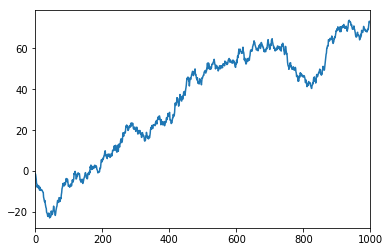

In [146]:
# 随机生成1000个数据
data = pd.Series(np.random.randn(1000), index = np.arange(1000))

# 为了方便效果，累加数据
data = data.cumsum()

# pandas数据可以直接观看其可视化形式
data.plot()
plt.show()

In [148]:
# 熟悉matplotlib，需要plot一个数据
# 我们可以使用plt.plot(x=, y=)，把x，y的数据作为参数存进去。
# 但是data本来就是一个数据，所以可以直接用plot.

In [149]:
# Dataframe可视化

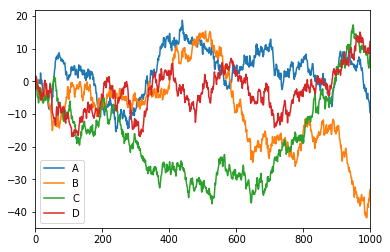

In [150]:
data = pd.DataFrame(
        np.random.randn(1000,4),
        index = np.arange(1000),
        columns = list('ABCD'))
data = data.cumsum()
data.plot()
plt.show()

In [151]:
# scatter 散点图
# bar 
# hist
# box
# kde
# area
# hexbin

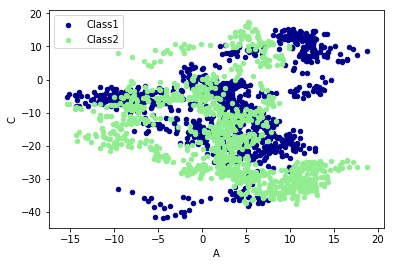

In [154]:
ax = data.plot.scatter(x='A',y='B',
                       color='DarkBlue',
                       label='Class1')

# 在同一个ax上面，选择不一样的数据列，不同的 color 和 label
data.plot.scatter(x='A',y='C',
                  color='LightGreen',
                  label='Class2',
                  ax=ax)
plt.show()